In [0]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!nvidia-smi

Sun Jan 12 05:09:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install --upgrade mxnet-cu100
!pip install autogluon

Requirement already up-to-date: mxnet-cu100 in /usr/local/lib/python3.6/dist-packages (1.5.1.post0)


In [0]:
!pip uninstall -y distributed

Uninstalling distributed-2.9.1:
  Successfully uninstalled distributed-2.9.1


In [0]:
pip install distributed

  Using cached https://files.pythonhosted.org/packages/fe/ad/9c13bac92f0f05973bb6bd179d68e825fc0bb2efbfd1fd2573d57702b410/distributed-2.9.1-py3-none-any.whl
     |████████████████████████████████| 491kB 2.8MB/s 
  Created wheel for tornado: filename=tornado-6.0.3-cp36-cp36m-linux_x86_64.whl size=423190 sha256=a1126e6685b87002ae01702a5b1b1e4cdb2b825bdb00224ccf2953a720b6ca92
  Stored in directory: /root/.cache/pip/wheels/84/bf/40/2f6ef700f48401ca40e5e3dd7d0e3c0a90e064897b7fe5fc08
Successfully built tornado
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 0.24.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=4.5.0, but you'll have tornado 6.0.3 which is incompatible.
  Found existing installation: tornado 4.5.3
    Uninstalling tornado-4.5.3:
      Successfully uninstalled tornado-4.5.3


In [0]:
pip install -U ipykernel

     |████████████████████████████████| 122kB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.6.0, but you'll have ipykernel 5.1.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 0.24.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=4.5.0, but you'll have tornado 6.0.3 which is incompatible.
  Found existing installation: ipykernel 4.6.1
    Uninstalling ipykernel-4.6.1:
      Successfully uninstalled ipykernel-4.6.1


In [0]:
import autogluon as ag
from autogluon import TabularPrediction as task

In [0]:
train_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
train_data = train_data.head(500) # subsample 500 data points for faster demo
print(train_data.head())

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073


   age   workclass  fnlwgt  ... hours-per-week  native-country   class
0   25     Private  178478  ...             40   United-States   <=50K
1   23   State-gov   61743  ...             35   United-States   <=50K
2   46     Private  376789  ...             15   United-States   <=50K
3   55           ?  200235  ...             50   United-States    >50K
4   36     Private  224541  ...             40     El-Salvador   <=50K

[5 rows x 15 columns]


In [0]:
label_column = 'class'
print("Summary of class variable: \n", train_data[label_column].describe())

Summary of class variable: 
 count        500
unique         2
top        <=50K
freq         394
Name: class, dtype: object


In [0]:
dir = 'agModels-predictClass' # specifies folder where to store trained models
predictor = task.fit(train_data=train_data, label=label_column, output_directory=dir)

Beginning AutoGluon training ...
Preprocessing data ...
Here are the first 10 unique label values in your data:  [' <=50K' ' >50K']
AutoGluon infers your prediction problem is: binary  (because only two unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Data preprocessing and feature engineering runtime = 0.09s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
Fitting model: RandomForestClassifierGini ...
	0.51s	 = Training runtime
	0.9	 = Validation accuracy score
Fitting model: RandomForestClassifierEntr ...
	0.5s	 = Training runtime
	0.89	 = Validation accuracy score
Fitting model: ExtraTreesClassifierGini ...
	0.4s	 = Training runtime
	0.87	 = Validation accuracy score
Fitting model: ExtraTr

In [0]:
test_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
print(test_data_nolab.head())

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


   age          workclass  fnlwgt  ... capital-loss  hours-per-week  native-country
0   31            Private  169085  ...            0              20   United-States
1   17   Self-emp-not-inc  226203  ...            0              45   United-States
2   47            Private   54260  ...         1887              60   United-States
3   21            Private  176262  ...            0              30   United-States
4   17            Private  241185  ...            0              20   United-States

[5 rows x 14 columns]


In [0]:
predictor = task.load(dir) # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.829972
Evaluations on test data:
{
    "accuracy": 0.8299723615518477,
    "accuracy_score": 0.8299723615518477,
    "balanced_accuracy_score": 0.7084375469344787,
    "matthews_corrcoef": 0.4847606963118391,
    "f1_score": 0.8299723615518477
}


Predictions:   [' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


Detailed (per-class) classification report:
{
    " <=50K": {
        "precision": 0.8524470416362309,
        "recall": 0.9397396322641256,
        "f1-score": 0.8939674433450366,
        "support": 7451
    },
    " >50K": {
        "precision": 0.7112540192926045,
        "recall": 0.4771354616048318,
        "f1-score": 0.571133488252001,
        "support": 2318
    },
    "accuracy": 0.8299723615518477,
    "macro avg": {
        "precision": 0.7818505304644177,
        "recall": 0.7084375469344787,
        "f1-score": 0.7325504657985189,
        "support": 9769
    },
    "weighted avg": {
        "precision": 0.8189445924815041,
        "recall": 0.8299723615518477,
        "f1-score": 0.8173650164942171,
        "support": 9769
    }
}


In [0]:
results = predictor.fit_summary()

*** Summary of fit() ***
Number of models trained: 11
Types of models trained: 
{'WeightedEnsembleModel', 'RFModel', 'LGBModel', 'KNNModel', 'CatboostModel', 'TabularNeuralNetModel'}
Validation performance of individual models: {'RandomForestClassifierGini': 0.9, 'RandomForestClassifierEntr': 0.89, 'ExtraTreesClassifierGini': 0.87, 'ExtraTreesClassifierEntr': 0.87, 'KNeighborsClassifierUnif': 0.8, 'KNeighborsClassifierDist': 0.77, 'LightGBMClassifier': 0.88, 'CatboostClassifier': 0.9, 'NeuralNetClassifier': 0.89, 'LightGBMClassifierCustom': 0.89, 'weighted_ensemble_l1': 0.91}
Best model (based on validation performance): weighted_ensemble_l1
Hyperparameter-tuning used: False
Bagging used: False 
Stack-ensembling used: False 
User-specified hyperparameters:
{'NN': {'num_epochs': 500}, 'GBM': {'num_boost_round': 10000}, 'CAT': {'iterations': 10000}, 'RF': {'n_estimators': 300}, 'XT': {'n_estimators': 300}, 'KNN': {}, 'custom': ['GBM']}
Plot summary of models saved to file: SummaryOfModel

In [0]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon categorized the features as: ", predictor.feature_types)

AutoGluon infers problem type is:  binary
AutoGluon categorized the features as:  {'nlp': [], 'vectorizers': [], 'int': ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], 'object': ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']}


In [0]:
age_column = 'age'
print("Summary of age variable: \n", train_data[age_column].describe())

Summary of age variable: 
 count    500.00000
mean      38.31400
std       13.85436
min       17.00000
25%       27.00000
50%       37.00000
75%       47.00000
max       90.00000
Name: age, dtype: float64


In [0]:
predictor_age = task.fit(train_data=train_data, output_directory="agModels-predictAge", label=age_column)
performance = predictor_age.evaluate(test_data)

Beginning AutoGluon training ...
Preprocessing data ...
Here are the first 10 unique label values in your data:  [25 23 46 55 36 51 33 18 43 41]
AutoGluon infers your prediction problem is: regression  (because dtype of label-column == int and many unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

	Data preprocessing and feature engineering runtime = 0.08s ...
AutoGluon will gauge predictive performance using evaluation metric: root_mean_squared_error
To change this, specify the eval_metric argument of fit()
Fitting model: RandomForestRegressorMSE ...
NumExpr defaulting to 2 threads.
	0.7s	 = Training runtime
	-11.223	 = Validation root_mean_squared_error score
Fitting model: ExtraTreesRegressorMSE ...
	0.5s	 = Training runtime
	-11.4515	 = Validation root_mean_squared_error score
Fitting model: KNeighborsRegressorUnif ...
	0.01s	 = Training runtime
	-

Predictive performance on given dataset: root_mean_squared_error = 10.977435075805934


In [0]:
import autogluon as ag
from autogluon import TabularPrediction as task

train_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
train_data = train_data.head(500) # subsample 500 data points for faster demo
print(train_data.head())

val_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')

label_column = 'occupation'
print("Summary of occupation column: \n", train_data['occupation'].describe())

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073


   age   workclass  fnlwgt  ... hours-per-week  native-country   class
0   25     Private  178478  ...             40   United-States   <=50K
1   23   State-gov   61743  ...             35   United-States   <=50K
2   46     Private  376789  ...             15   United-States   <=50K
3   55           ?  200235  ...             50   United-States    >50K
4   36     Private  224541  ...             40     El-Salvador   <=50K

[5 rows x 15 columns]


Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


Summary of occupation column: 
 count                  500
unique                  14
top        Exec-managerial
freq                    69
Name: occupation, dtype: object


Beginning AutoGluon training ... Time limit = 120s
Preprocessing data ...
Here are the first 10 unique label values in your data:  [' Tech-support' ' Transport-moving' ' Other-service' ' ?'
 ' Handlers-cleaners' ' Sales' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Prof-specialty']
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Fraction of data that will be kept for training models: 0.998
	Data preprocessing and feature engineering runtime = 0.14s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 5


Finished Task with config: {'feature_fraction': 1.0, 'learning_rate': 0.1, 'min_data_in_leaf': 20, 'num_leaves': 36} and reward: 0.28661044837515426
Finished Task with config: b'\x80\x03}q\x00(X\x10\x00\x00\x00feature_fractionq\x01G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00learning_rateq\x02G?\xb9\x99\x99\x99\x99\x99\x9aX\x10\x00\x00\x00min_data_in_leafq\x03K\x14X\n\x00\x00\x00num_leavesq\x04K$u.' and reward: 0.28661044837515426
Finished Task with config: b'\x80\x03}q\x00(X\x10\x00\x00\x00feature_fractionq\x01G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00learning_rateq\x02G?\xb9\x99\x99\x99\x99\x99\x9aX\x10\x00\x00\x00min_data_in_leafq\x03K\x14X\n\x00\x00\x00num_leavesq\x04K$u.' and reward: 0.28661044837515426
Finished Task with config: {'feature_fraction': 0.9171081931061593, 'learning_rate': 0.016533069207300615, 'min_data_in_leaf': 8, 'num_leaves': 36} and reward: 0.27714932126696834
Finished Task with config: b'\x80\x03}q\x00(X\x10\x00\x00\x00feature_fractionq\x01G?\xedX\xf3H\t\x1

Finished Task with config: {'feature_fraction': 0.754191906738651, 'learning_rate': 0.11126174496398228, 'min_data_in_leaf': 18, 'num_leaves': 59} and reward: 0.29288358700123407
Finished Task with config: b'\x80\x03}q\x00(X\x10\x00\x00\x00feature_fractionq\x01G?\xe8"W\x10\xcb6aX\r\x00\x00\x00learning_rateq\x02G?\xbc{\xa6S\xea\x8b\xdcX\x10\x00\x00\x00min_data_in_leafq\x03K\x12X\n\x00\x00\x00num_leavesq\x04K;u.' and reward: 0.29288358700123407
Finished Task with config: b'\x80\x03}q\x00(X\x10\x00\x00\x00feature_fractionq\x01G?\xe8"W\x10\xcb6aX\r\x00\x00\x00learning_rateq\x02G?\xbc{\xa6S\xea\x8b\xdcX\x10\x00\x00\x00min_data_in_leafq\x03K\x12X\n\x00\x00\x00num_leavesq\x04K;u.' and reward: 0.29288358700123407
Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 5


Finished Task with config: {'activation.choice': 0, 'dropout_prob': 0.1, 'embedding_size_factor': 1.0, 'layers.choice': 0, 'learning_rate': 0.0005, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 1e-06} and reward: 0.12659399424105305
Finished Task with config: b'\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x00X\x0c\x00\x00\x00dropout_probq\x02G?\xb9\x99\x99\x99\x99\x99\x9aX\x15\x00\x00\x00embedding_size_factorq\x03G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00layers.choiceq\x04K\x00X\r\x00\x00\x00learning_rateq\x05G?@bM\xd2\xf1\xa9\xfcX\x13\x00\x00\x00network_type.choiceq\x06K\x00X\x14\x00\x00\x00use_batchnorm.choiceq\x07K\x00X\x0c\x00\x00\x00weight_decayq\x08G>\xb0\xc6\xf7\xa0\xb5\xed\x8du.' and reward: 0.12659399424105305
Finished Task with config: b'\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x00X\x0c\x00\x00\x00dropout_probq\x02G?\xb9\x99\x99\x99\x99\x99\x9aX\x15\x00\x00\x00embedding_size_factorq\x03G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x

Finished Task with config: {'activation.choice': 2, 'dropout_prob': 0.37790403661777555, 'embedding_size_factor': 1.0722982862742443, 'layers.choice': 0, 'learning_rate': 0.0011524203932428286, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 3.034876897869041e-07} and reward: 0.23292883587001234
Finished Task with config: b'\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x02X\x0c\x00\x00\x00dropout_probq\x02G?\xd8/\x94i\x93.\xd1X\x15\x00\x00\x00embedding_size_factorq\x03G?\xf1("?q\xac\xf4X\r\x00\x00\x00layers.choiceq\x04K\x00X\r\x00\x00\x00learning_rateq\x05G?R\xe1\x99\xf9\x9d:AX\x13\x00\x00\x00network_type.choiceq\x06K\x00X\x14\x00\x00\x00use_batchnorm.choiceq\x07K\x00X\x0c\x00\x00\x00weight_decayq\x08G>\x94]\xe0\xf9\xa8\xb1\x81u.' and reward: 0.23292883587001234
Finished Task with config: b'\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x02X\x0c\x00\x00\x00dropout_probq\x02G?\xd8/\x94i\x93.\xd1X\x15\x00\x00\x00embedding_size_factorq\x03G?\xf1("?q

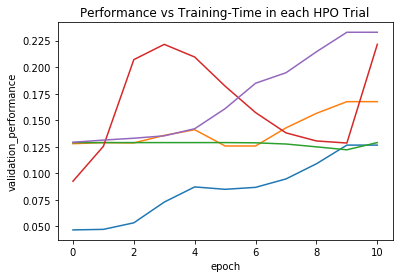

In [0]:
hp_tune = True  # whether or not to do hyperparameter optimization

nn_options = { # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10, # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'), # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100]),
      # Each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), # dropout probability (real-valued hyperparameter)
}

gbm_options = { # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100, # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {'NN': nn_options, 'GBM': gbm_options}  # hyperparameters of each model type
# If one of these keys is missing from hyperparameters dict, then no models of that type are trained.

time_limits = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine
output_directory = 'agModels-predictOccupation'  # folder where to store trained models

predictor = task.fit(train_data=train_data, tuning_data=val_data, label=label_column,
                     output_directory=output_directory, time_limits=time_limits, num_trials=num_trials,
                     hyperparameter_tune=hp_tune, hyperparameters=hyperparameters,
                     search_strategy=search_strategy)

In [0]:
test_data = val_data.copy()
y_test = test_data[label_column]
test_data = test_data.drop(labels=[label_column],axis=1)  # delete label column

y_pred = predictor.predict(test_data)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=False)

Evaluation: accuracy on test data: 0.297164


Predictions:   [' Other-service', ' ?', ' Exec-managerial', ' Sales', ' Other-service']


In [0]:
datapoint = test_data.iloc[[0]]  # Note: .iloc[0] won't work because it returns pandas Series instead of DataFrame
print(datapoint)
print("Prediction:", predictor.predict(datapoint))

   age workclass  fnlwgt  ... hours-per-week  native-country   class
0   31   Private  169085  ...             20   United-States   <=50K

[1 rows x 14 columns]
Prediction: [' Other-service']


*** Summary of fit() ***
Number of models trained: 11
Types of models trained: 
{'LGBModel', 'WeightedEnsembleModel', 'TabularNeuralNetModel'}
Validation performance of individual models: {'LightGBMClassifier_trial_0': 0.28661044837515426, 'LightGBMClassifier_trial_1': 0.27714932126696834, 'LightGBMClassifier_trial_2': 0.2892842451665981, 'LightGBMClassifier_trial_3': 0.28342245989304815, 'LightGBMClassifier_trial_4': 0.29288358700123407, 'NeuralNetClassifier_trial_5': 0.12659399424105305, 'NeuralNetClassifier_trial_6': 0.16752365281777046, 'NeuralNetClassifier_trial_7': 0.12895927601809956, 'NeuralNetClassifier_trial_8': 0.22151378033730976, 'NeuralNetClassifier_trial_9': 0.23292883587001234, 'weighted_ensemble_l1': 0.2985396955985191}
Best model (based on validation performance): weighted_ensemble_l1
Hyperparameter-tuning used: True
Bagging used: False 
Stack-ensembling used: False 
User-specified hyperparameters:
{'NN': {'num_epochs': 10, 'learning_rate': Real: lower=0.0001, upper=0

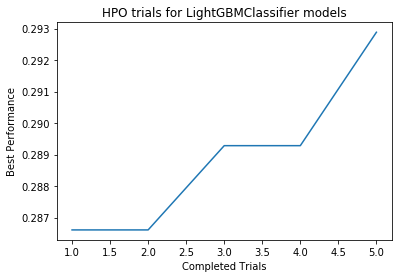

Plot summary of models saved to file: NeuralNetClassifier_HPOmodelsummary.html
Plot of HPO performance saved to file: agModels-predictOccupation/NeuralNetClassifier_HPOperformanceVStrials.png


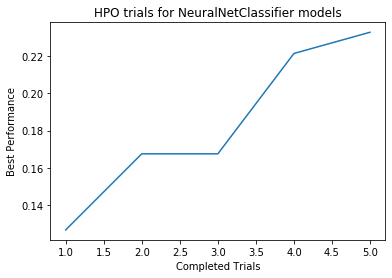

*** Details of Hyperparameter optimization ***
HPO for LightGBMClassifier model:  Num. configurations tried = 5, Time spent = 13.94182276725769, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: accuracy = 0.29288358700123407):
{'feature_fraction': 0.754191906738651, 'learning_rate': 0.11126174496398228, 'min_data_in_leaf': 18, 'num_leaves': 59}
HPO for NeuralNetClassifier model:  Num. configurations tried = 5, Time spent = 65.2392065525055, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: accuracy = 0.23292883587001234):
{'activation.choice': 2, 'dropout_prob': 0.37790403661777555, 'embedding_size_factor': 1.0722982862742443, 'layers.choice': 0, 'learning_rate': 0.0011524203932428286, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 3.034876897869041e-07}
*** End of fit() summary ***


In [0]:
results = predictor.fit_summary()

In [0]:
metric = 'balanced_accuracy' # Use balanced accuracy rather than standard accuracy. You can also define your own function here, see examples in: autogluon/utils/tabular/metrics/
predictor = task.fit(train_data=train_data, label=label_column, eval_metric=metric)

performance = predictor.evaluate(val_data)

No output_directory specified. Models will be saved in: AutogluonModels/ag-20200112_065902/
Beginning AutoGluon training ...
Preprocessing data ...
Here are the first 10 unique label values in your data:  [' Tech-support' ' Transport-moving' ' Other-service' ' ?'
 ' Handlers-cleaners' ' Sales' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Prof-specialty']
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Fraction of data that will be kept for training models: 0.998
	Data preprocessing and feature engineering runtime = 0.1s ...
AutoGluon will gauge predictive performance using evaluation metric: balanced_accuracy
To change this, specify the eval_metric argument of fit()
Fitting model: RandomForestClassifierGini ...
	0.63s	 = Training runtime
	0.1862	 = Validation balanced_accur

Predictive performance on given dataset: balanced_accuracy = 0.25409476076745935


In [0]:
predictor = task.fit(train_data=train_data, label=label_column, eval_metric=metric, num_bagging_folds=5, stack_ensemble_levels=1, hyperparameters = {'NN':{'num_epochs':5}, 'GBM':{'num_boost_round':100}})

No output_directory specified. Models will be saved in: AutogluonModels/ag-20200112_065955/
Beginning AutoGluon training ...
Preprocessing data ...
Here are the first 10 unique label values in your data:  [' Tech-support' ' Transport-moving' ' Other-service' ' ?'
 ' Handlers-cleaners' ' Sales' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Prof-specialty']
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Fraction of data that will be kept for training models: 0.998
	Data preprocessing and feature engineering runtime = 0.09s ...
AutoGluon will gauge predictive performance using evaluation metric: balanced_accuracy
To change this, specify the eval_metric argument of fit()
Fitting model: LightGBMClassifier ...
	3.68s	 = Training runtime
	0.204	 = Validation balanced_accuracy scor

In [0]:
import autogluon as ag
from autogluon import ImageClassification as task

In [0]:
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)

'data'

In [0]:
dataset = task.Dataset('data/train')

In [0]:
test_dataset = task.Dataset('data/test', train=False)

In [0]:
if ag.get_gpu_count() == 0:
    dataset = task.Dataset(name='FashionMNIST')
    test_dataset = task.Dataset(name='FashionMNIST', train=False)

In [0]:
classifier = task.fit(dataset,
                      epochs=10,
                      ngpus_per_trial=1,
                      verbose=False)

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


Model file is not found. Downloading.


100%|██████████| 55344/55344 [00:02<00:00, 25739.84KB/s]


Finished Task with config: {'net.choice': 0, 'optimizer.learning_rate': 0.0031622777, 'optimizer.wd': 0.0003162278} and reward: 0.7125



Model file is not found. Downloading.


42433KB [00:01, 22295.50KB/s]                           


Finished Task with config: {'net.choice': 1, 'optimizer.learning_rate': 0.0035541230294985145, 'optimizer.wd': 0.0008515407815084728} and reward: 0.65625


In [0]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])

Top-1 val acc: 0.713


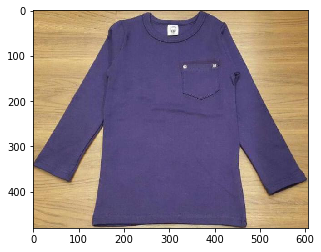

The input picture is classified as [BabyShirt], with probability 0.64.


In [0]:
# skip this if training FashionMNIST on CPU.
if ag.get_gpu_count() > 0:
    image = 'data/test/BabyShirt/BabyShirt_323.jpg'
    ind, prob = classifier.predict(image)

    print('The input picture is classified as [%s], with probability %.2f.' %
          (dataset.init().classes[ind.asscalar()], prob.asscalar()))

In [0]:
test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.750


In [0]:
import autogluon as ag
from autogluon import ImageClassification as task
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)

'data'

In [0]:
dataset = task.Dataset('data/train')

In [0]:
import gluoncv as gcv

@ag.func(
    multiplier=ag.Categorical(0.25, 1.0),
)
def get_mobilenet(multiplier):
    return gcv.model_zoo.MobileNetV2(multiplier=multiplier, classes=4)

net = ag.space.Categorical('resnet50_v1b', get_mobilenet())
print(net)

Categorical['resnet50_v1b', AutoGluonObject]


In [0]:
from mxnet import optimizer as optim

@ag.obj(
    learning_rate=ag.space.Real(1e-4, 1e-2, log=True),
    momentum=ag.space.Real(0.85, 0.95),
    wd=ag.space.Real(1e-6, 1e-2, log=True)
)
class NAG(optim.NAG):
    pass

optimizer = NAG()
print(optimizer)

AutoGluonObject -- NAG


In [0]:
time_limits = 2*60
epochs = 10

classifier = task.fit(dataset,
                      net=net,
                      optimizer=optimizer,
                      search_strategy='skopt',
                      search_options={'base_estimator': 'RF', 'acq_func': 'EI'},
                      time_limits=time_limits,
                      epochs=epochs,
                      ngpus_per_trial=1)

print('Top-1 val acc: %.3f' % classifier.results[classifier.results['reward_attr']])

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


Finished Task with config: {'net.1.multiplier.choice': 0, 'net.choice': 0, 'optimizer.learning_rate': 0.001, 'optimizer.momentum': 0.9, 'optimizer.wd': 0.0001} and reward: 0.8375
Finished Task with config: b'\x80\x03}q\x00(X\x17\x00\x00\x00net.1.multiplier.choiceq\x01K\x00X\n\x00\x00\x00net.choiceq\x02K\x00X\x17\x00\x00\x00optimizer.learning_rateq\x03G?PbM\xd2\xf1\xa9\xfcX\x12\x00\x00\x00optimizer.momentumq\x04G?\xec\xcc\xcc\xcc\xcc\xcc\xcdX\x0c\x00\x00\x00optimizer.wdq\x05G?\x1a6\xe2\xeb\x1cC-u.' and reward: 0.8375
Finished Task with config: b'\x80\x03}q\x00(X\x17\x00\x00\x00net.1.multiplier.choiceq\x01K\x00X\n\x00\x00\x00net.choiceq\x02K\x00X\x17\x00\x00\x00optimizer.learning_rateq\x03G?PbM\xd2\xf1\xa9\xfcX\x12\x00\x00\x00optimizer.momentumq\x04G?\xec\xcc\xcc\xcc\xcc\xcc\xcdX\x0c\x00\x00\x00optimizer.wdq\x05G?\x1a6\xe2\xeb\x1cC-u.' and reward: 0.8375


Finished Task with config: {'net.1.multiplier.choice': 1, 'net.choice': 0, 'optimizer.learning_rate': 0.00038275382145813394, 'optimizer.momentum': 0.9397160323580834, 'optimizer.wd': 0.0002708404388712094} and reward: 0.76875
Finished Task with config: b"\x80\x03}q\x00(X\x17\x00\x00\x00net.1.multiplier.choiceq\x01K\x01X\n\x00\x00\x00net.choiceq\x02K\x00X\x17\x00\x00\x00optimizer.learning_rateq\x03G?9\x15\x8b%D\xd7\xc4X\x12\x00\x00\x00optimizer.momentumq\x04G?\xee\x12'[P'\xb3X\x0c\x00\x00\x00optimizer.wdq\x05G?1\xbf\xf2\xd3\xcf\x93\xd8u." and reward: 0.76875
Finished Task with config: b"\x80\x03}q\x00(X\x17\x00\x00\x00net.1.multiplier.choiceq\x01K\x01X\n\x00\x00\x00net.choiceq\x02K\x00X\x17\x00\x00\x00optimizer.learning_rateq\x03G?9\x15\x8b%D\xd7\xc4X\x12\x00\x00\x00optimizer.momentumq\x04G?\xee\x12'[P'\xb3X\x0c\x00\x00\x00optimizer.wdq\x05G?1\xbf\xf2\xd3\xcf\x93\xd8u." and reward: 0.76875



Top-1 val acc: 0.838


In [0]:
test_dataset = task.Dataset('data/test', train=False)

test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.891


Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 4


Finished Task with config: {'lr_scheduler.choice': 0, 'net.1.multiplier.choice': 0, 'net.choice': 0, 'optimizer.learning_rate': 0.001, 'optimizer.momentum': 0.9, 'optimizer.wd': 0.0001} and reward: 0.78125
Finished Task with config: {'lr_scheduler.choice': 0, 'net.1.multiplier.choice': 0, 'net.choice': 1, 'optimizer.learning_rate': 0.004393788796843589, 'optimizer.momentum': 0.8958674706113223, 'optimizer.wd': 2.555239467258173e-05} and reward: 0.275
Finished Task with config: {'lr_scheduler.choice': 1, 'net.1.multiplier.choice': 0, 'net.choice': 0, 'optimizer.learning_rate': 0.007882785926652557, 'optimizer.momentum': 0.8860730764586923, 'optimizer.wd': 8.813300105596802e-05} and reward: 0.88125


Finished Task with config: {'lr_scheduler.choice': 0, 'net.1.multiplier.choice': 0, 'net.choice': 1, 'optimizer.learning_rate': 0.0005151935386249689, 'optimizer.momentum': 0.9398075492971218, 'optimizer.wd': 0.00027485319167793875} and reward: 0.275


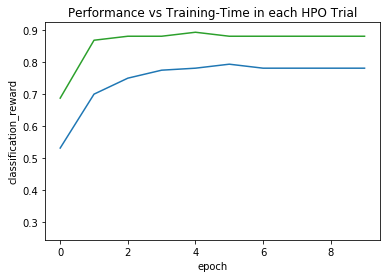

Top-1 val acc: 0.881


In [0]:
search_strategy = 'hyperband'

classifier = task.fit(dataset,
                      net=net,
                      optimizer=optimizer,
                      lr_scheduler=ag.space.Categorical('poly', 'cosine'),
                      search_strategy=search_strategy,
                      epochs=epochs,
                      num_trials=4,
                      verbose=False,
                      plot_results=True,
                      ngpus_per_trial=1,
                      grace_period=1)

print('Top-1 val acc: %.3f' % classifier.results[classifier.results['reward_attr']])

In [0]:
test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.922


In [0]:
import autogluon as ag
from autogluon import ObjectDetection as task

In [0]:
root = './'
filename_zip = ag.download('https://autogluon.s3.amazonaws.com/datasets/tiny_motorbike.zip',
                        path=root)
filename = ag.unzip(filename_zip, root=root)

In [0]:
import os
data_root = os.path.join(root, filename)
dataset_train = task.Dataset(data_root, classes=('motorbike',))

>>> create dataset(VOC format) 


In [0]:
time_limits = 5*60*60 # 5 days
epochs = 30
detector = task.fit(dataset_train,
                    num_trials=2,
                    epochs=epochs,
                    lr=ag.Categorical(5e-4, 1e-4),
                    ngpus_per_trial=1,
                    time_limits=time_limits)

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


Model file is not found. Downloading.


88993KB [00:03, 29616.61KB/s]                           
{'dataset': <autogluon.task.object_detection.dataset.voc.CustomVOCDetection object at 0x7f5315b76b70>, 'net': 'mobilenet1.0', 'lr': 0.0005, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'split_ratio': 0.2, 'epochs': 30, 'num_workers': 2, 'hybridize': True, 'verbose': False, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': '', 'syncbn': False, 'task_id': 21}
[Epoch 0] Training cost: 3.611, ObjLoss=4017.630, BoxCenterLoss=3.465, BoxScaleLoss=3.050, ClassLoss=0.872
[Epoch 0] Validatio

{'dataset': <autogluon.task.object_detection.dataset.voc.CustomVOCDetection object at 0x7f530665b4a8>, 'net': 'mobilenet1.0', 'lr': 0.0001, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'split_ratio': 0.2, 'epochs': 30, 'num_workers': 2, 'hybridize': True, 'verbose': False, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': '', 'syncbn': False, 'task_id': 22}
[Epoch 0] Training cost: 3.193, ObjLoss=4381.671, BoxCenterLoss=3.586, BoxScaleLoss=3.164, ClassLoss=1.109
[Epoch 0] Validation: motorbike=0.0018080358660726627 mAP=0.0018080358660726

In [0]:
dataset_test = task.Dataset(data_root, index_file_name='test', classes=('motorbike',))

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

>>> create dataset(VOC format) 


mAP on test dataset: 0.8372409812409813


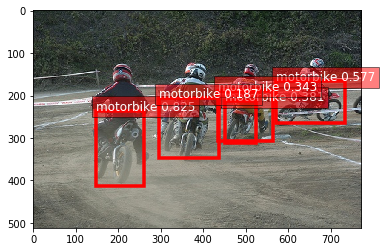

In [0]:
image = '000467.jpg'
image_path = os.path.join(data_root, 'JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

In [0]:
import autogluon as ag
from autogluon import TextClassification as task

In [0]:
dataset = task.Dataset(name='ToySST')

In [0]:
predictor = task.fit(dataset, epochs=1)

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


Vocab file is not found. Downloading.


Model file not found. Downloading to /root/.mxnet/models/bert_12_768_12_book_corpus_wiki_en_uncased-75cc780f.params.


validation metrics:accuracy:0.9138
Finished Task with config: {'lr': 6.32456e-05, 'net.choice': 0, 'pretrained_dataset.choice': 0} and reward: 0.9137931034482759


Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.5230
Finished Task with config: {'lr': 0.00013499712342594268, 'net.choice': 0, 'pretrained_dataset.choice': 0} and reward: 0.5229885057471264
Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.9138


In [0]:
print('Top-1 val acc: %.3f' % predictor.results['best_reward'])

Top-1 val acc: 0.914


In [0]:
test_acc = predictor.evaluate(dataset)
print('Top-1 test acc: %.3f' % test_acc)

Top-1 test acc: 0.914


In [0]:
sentence = 'I feel this is awesome!'
ind = predictor.predict(sentence)
print('The input sentence sentiment is classified as [%d].' % ind.asscalar())

The input sentence sentiment is classified as [1].


In [0]:
print('The best configuration is:')
print(predictor.results['best_config'])

The best configuration is:
{'lr': 6.32456e-05, 'net.choice': 0, 'pretrained_dataset.choice': 0}


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def gaussian(x, y, x0, y0, xalpha, yalpha, A):
    return A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)

x, y = np.linspace(0, 99, 100), np.linspace(0, 99, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
ps = [(20, 70, 35, 40, 1),
      (80, 40, 20, 20, 0.7)]
for p in ps:
    Z += gaussian(X, Y, *p)

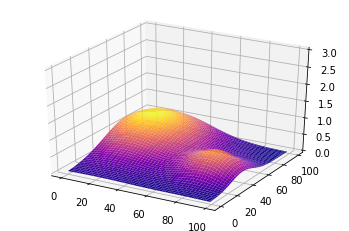

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_zlim(0,np.max(Z)+2)
plt.show()

In [0]:
import autogluon as ag

@ag.args(
    x=ag.space.Categorical(*list(range(100))),
    y=ag.space.Categorical(*list(range(100))),
)
def rl_simulation(args, reporter):
    x, y = args.x, args.y
    reporter(accuracy=Z[y][x])

In [0]:
random_scheduler = ag.scheduler.FIFOScheduler(rl_simulation, rl_simulation.args,
                                              resource={'num_cpus': 1, 'num_gpus': 0},
                                              num_trials=300,
                                              reward_attr="accuracy",
                                              resume=False)
random_scheduler.run()
random_scheduler.join_jobs()
print('Best config: {}, best reward: {}'.format(random_scheduler.get_best_config(), random_scheduler.get_best_reward()))

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 300


Finished Task with config: {'x.choice': 0, 'y.choice': 0} and reward: 0.033741370964360654
Finished Task with config: {'x.choice': 43, 'y.choice': 80} and reward: 0.6103937058422727
Finished Task with config: {'x.choice': 41, 'y.choice': 35} and reward: 0.3391236686676639
Finished Task with config: {'x.choice': 42, 'y.choice': 84} and reward: 0.5960976249444218
Finished Task with config: {'x.choice': 15, 'y.choice': 48} and reward: 0.7240557751544462
Finished Task with config: {'x.choice': 55, 'y.choice': 75} and reward: 0.369038557605901
Finished Task with config: {'x.choice': 24, 'y.choice': 4} and reward: 0.06486838954496603
Finished Task with config: {'x.choice': 55, 'y.choice': 54} and reward: 0.40337560868586475
Finished Task with config: {'x.choice': 91, 'y.choice': 53} and reward: 0.35265385922500975
Finished Task with config: {'x.choice': 46, 'y.choice': 45} and reward: 0.4262137099986466
Finished Task with config: {'x.choice': 90, 'y.choice': 78} and reward: 0.032345072081752

Finished Task with config: {'x.choice': 96, 'y.choice': 6} and reward: 0.02120601055367787


Best config: {'x.choice': 19, 'y.choice': 70}, best reward: 0.999190734961402


In [0]:
rl_scheduler = ag.scheduler.RLScheduler(rl_simulation,
                                        resource={'num_cpus': 1, 'num_gpus': 0},
                                        num_trials=300,
                                        reward_attr="accuracy",
                                        controller_batch_size=4,
                                        controller_lr=5e-3,
                                        checkpoint='./rl_exp/checkerpoint.ag',
                                        resume=False,
                                        sync=True)
rl_scheduler.run()
rl_scheduler.join_jobs()
print('Best config: {}, best reward: {}'.format(rl_scheduler.get_best_config(), rl_scheduler.get_best_reward()))

Reserved DistributedResource(
	Node = Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/2925/1' processes=1 threads=2, memory=12.62 GB>
	nCPUs = 0) in Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/2925/1' processes=1 threads=2, memory=12.62 GB>
Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 300


Finished Task with config: {'x.choice': 54, 'y.choice': 60} and reward: 0.4131320021194963
Finished Task with config: {'x.choice': 59, 'y.choice': 85} and reward: 0.25248241948989986
Finished Task with config: {'x.choice': 71, 'y.choice': 54} and reward: 0.452177348673922
Finished Task with config: {'x.choice': 84, 'y.choice': 84} and reward: 0.03655423885462522
Finished Task with config: {'x.choice': 42, 'y.choice': 43} and reward: 0.44561928050295485
Finished Task with config: {'x.choice': 62, 'y.choice': 29} and reward: 0.3129734289166378
Finished Task with config: {'x.choice': 64, 'y.choice': 89} and reward: 0.16521724999224768
Finished Task with config: {'x.choice': 38, 'y.choice': 5} and reward: 0.055140459703497166
Finished Task with config: {'x.choice': 96, 'y.choice': 78} and reward: 0.018592630051464068
Finished Task with config: {'x.choice': 27, 'y.choice': 80} and reward: 0.9025895808289532
Finished Task with config: {'x.choice': 38, 'y.choice': 52} and reward: 0.6328227532


Best config: {'x.choice': 16, 'y.choice': 74}, best reward: 0.9892634227019491


In [0]:
results_rl = [v[0]['accuracy'] for v in rl_scheduler.training_history.values()]
results_random = [v[0]['accuracy'] for v in random_scheduler.training_history.values()]

In [0]:
import statistics
results1 = [statistics.mean(results_random[i:i+10]) for i in range(0, len(results_random), 10)]
results2 = [statistics.mean(results_rl[i:i+10]) for i in range(0, len(results_rl), 10)]

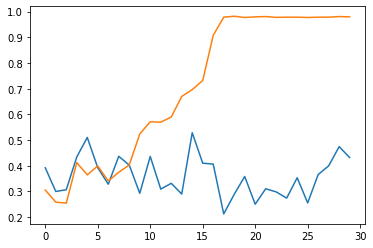

In [0]:
plt.plot(range(len(results1)), results1, range(len(results2)), results2)

In [0]:
import autogluon as ag
import mxnet as mx
import mxnet.gluon.nn as nn

In [0]:
class Identity(mx.gluon.HybridBlock):
    def hybrid_forward(self, F, x):
        return x

class ConvBNReLU(mx.gluon.HybridBlock):
    def __init__(self, in_channels, channels, kernel, stride):
        super().__init__()
        padding = (kernel - 1) // 2
        self.conv = nn.Conv2D(channels, kernel, stride, padding, in_channels=in_channels)
        self.bn = nn.BatchNorm(in_channels=channels)
        self.relu = nn.Activation('relu')
    def hybrid_forward(self, F, x):
        return self.relu(self.bn(self.conv(x)))

In [0]:
from autogluon.contrib.enas import *

@enas_unit()
class ResUnit(mx.gluon.HybridBlock):
    def __init__(self, in_channels, channels, hidden_channels, kernel, stride):
        super().__init__()
        self.conv1 = ConvBNReLU(in_channels, hidden_channels, kernel, stride)
        self.conv2 = ConvBNReLU(hidden_channels, channels, kernel, 1)
        if in_channels == channels and stride == 1:
            self.shortcut = Identity()
        else:
            self.shortcut = nn.Conv2D(channels, 1, stride, in_channels=in_channels)
    def hybrid_forward(self, F, x):
        return self.conv2(self.conv1(x)) + self.shortcut(x)

In [0]:
mynet = ENAS_Sequential(
    ResUnit(1, 8, hidden_channels=ag.space.Categorical(4, 8), kernel=ag.space.Categorical(3, 5), stride=2),
    ResUnit(8, 8, hidden_channels=8, kernel=ag.space.Categorical(3, 5), stride=2),
    ResUnit(8, 16, hidden_channels=8, kernel=ag.space.Categorical(3, 5), stride=2),
    ResUnit(16, 16, hidden_channels=8, kernel=ag.space.Categorical(3, 5), stride=1, with_zero=True),
    ResUnit(16, 16, hidden_channels=8, kernel=ag.space.Categorical(3, 5), stride=1, with_zero=True),
    nn.GlobalAvgPool2D(),
    nn.Flatten(),
    nn.Activation('relu'),
    nn.Dense(10, in_units=16),
)

mynet.initialize()

#mynet.graph

In [0]:
x = mx.nd.random.uniform(shape=(1, 1, 28, 28))
y = mynet.evaluate_latency(x)

In [7]:
print('Average latency is {:.2f} ms, latency of the current architecture is {:.2f} ms'.format(mynet.avg_latency, mynet.latency))

Average latency is 2.93 ms, latency of the current architecture is 3.74 ms


In [8]:
mynet.nparams

8714

In [0]:
reward_fn = lambda metric, net: metric * ((net.avg_latency / net.latency) ** 0.1)

In [10]:
scheduler = ENAS_Scheduler(mynet, train_set='mnist',
                           reward_fn=reward_fn, batch_size=128, num_gpus=1,
                           warmup_epochs=0, epochs=1, controller_lr=3e-3,
                           plot_frequency=10, update_arch_frequency=5)

get_built_in_dataset mnist
get_built_in_dataset mnist


In [11]:
scheduler.run()

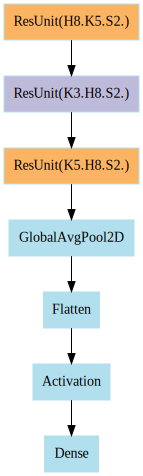

In [12]:
mynet.graph

In [13]:
reward_fn = lambda metric, net: metric * ((net.avg_latency / net.latency) ** 0.8)
mynet.initialize(force_reinit=True)
scheduler = ENAS_Scheduler(mynet, train_set='mnist',
                           reward_fn=reward_fn, batch_size=128, num_gpus=1,
                           warmup_epochs=0, epochs=1, controller_lr=3e-3,
                           plot_frequency=10, update_arch_frequency=5)
scheduler.run()

get_built_in_dataset mnist
get_built_in_dataset mnist


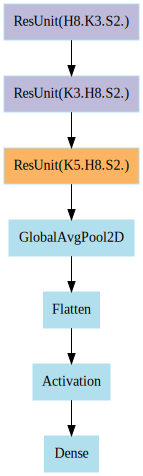

In [14]:
mynet.graph

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm

In [16]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

# the datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

0it [00:00, ?it/s]

9920512it [00:02, 3855861.56it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 57677.18it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:01, 1070097.30it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 21853.95it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
def train_mnist(args, reporter):
    # get variables from args
    lr = args.lr
    wd = args.wd
    epochs = args.epochs
    net = args.net
    print('lr: {}, wd: {}'.format(lr, wd))

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Model
    net = net.to(device)

    if device == 'cuda':
        net = nn.DataParallel(net)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=args.lr, momentum=0.9, weight_decay=wd)

    # datasets and dataloaders
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Training
    def train(epoch):
        net.train()
        train_loss, correct, total = 0, 0, 0
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    def test(epoch):
        net.eval()
        test_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        acc = 100.*correct/total
        reporter(epoch=epoch, accuracy=acc)

    for epoch in tqdm(range(0, epochs)):
        train(epoch)
        test(epoch)

In [0]:
import autogluon as ag

@ag.obj(
    hidden_conv=ag.space.Int(6, 12),
    hidden_fc=ag.space.Categorical(80, 120, 160),
)
class Net(nn.Module):
    def __init__(self, hidden_conv, hidden_fc):
        super().__init__()
        self.conv1 = nn.Conv2d(1, hidden_conv, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_conv, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, hidden_fc)
        self.fc2 = nn.Linear(hidden_fc, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
@ag.args(
    lr = ag.space.Real(0.01, 0.2, log=True),
    wd = ag.space.Real(1e-4, 5e-4, log=True),
    net = Net(),
    epochs=5,
)
def ag_train_mnist(args, reporter):
    return train_mnist(args, reporter)

In [22]:
myscheduler = ag.scheduler.FIFOScheduler(ag_train_mnist,
                                         resource={'num_cpus': 2, 'num_gpus': 1},
                                         num_trials=2,
                                         time_attr='epoch',
                                         reward_attr="accuracy")
print(myscheduler)

FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/34084/1' processes=1 threads=2, memory=12.62 GB>, Resource: NodeResourceManager(2 CPUs, 1 GPUs))
})



In [23]:
myscheduler.run()
myscheduler.join_jobs()

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


lr: 0.0447213595, wd: 0.0002236068


Finished Task with config: {'lr': 0.0447213595, 'net.hidden_conv': 9, 'net.hidden_fc.choice': 0, 'wd': 0.0002236068} and reward: 98.67



lr: 0.07387861966019671, wd: 0.0003095874313697951


Finished Task with config: {'lr': 0.07387861966019671, 'net.hidden_conv': 9, 'net.hidden_fc.choice': 0, 'wd': 0.0003095874313697951} and reward: 98.78


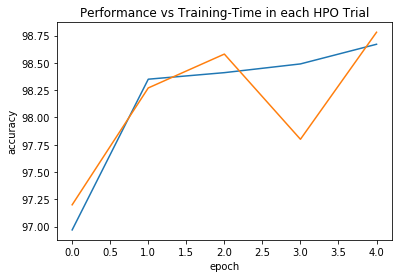

The Best Configuration and Accuracy are: {'lr': 0.07387861966019671, 'net.hidden_conv': 9, 'net.hidden_fc.choice': 0, 'wd': 0.0003095874313697951}, 98.78


In [24]:
myscheduler.get_training_curves(plot=True,use_legend=False)
print('The Best Configuration and Accuracy are: {}, {}'.format(myscheduler.get_best_config(),
                               myscheduler.get_best_reward()))